In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("HRDataset_v14.csv")

In [5]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [7]:
df.shape

(311, 36)

In [8]:
df.fillna("0", inplace = True)

In [9]:
df.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [13]:
df.Department.unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [14]:
df['Department'] = df['Department'].replace('Production       ', 'Production')

In [15]:
df.Sex.unique()

array(['M ', 'F'], dtype=object)

In [16]:
df['Sex'] = df['Sex'].replace('M ', 'M')

EDA

In [17]:
y1 = df.Salary.sort_values(ascending=False).head(10)

In [18]:
y2 = df.Salary.sort_values(ascending = False).tail(10)

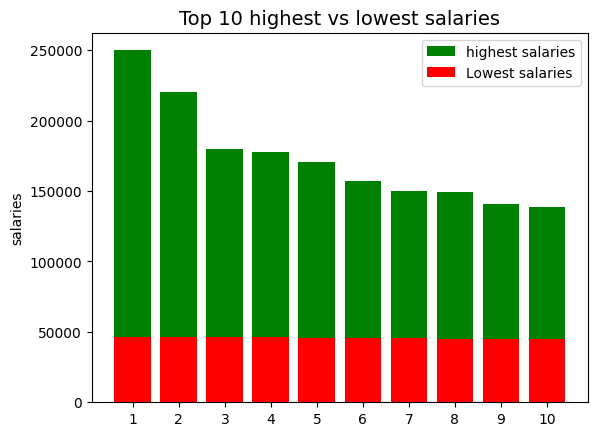

In [19]:
c = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = df.Salary.sort_values(ascending = False).head(10)
y2 = df.Salary.sort_values(ascending = False).tail(10)

plt.bar(c, y1, color = 'g', label = 'highest salaries')
plt.bar(c, y2, color = 'r', label = 'Lowest salaries')


plt.title("Top 10 highest vs lowest salaries", fontsize = 14)

plt.xticks(c)
plt.ylabel('salaries')
plt.legend()
plt.show()

Identifying outliers (based on salary) in each department using box plot

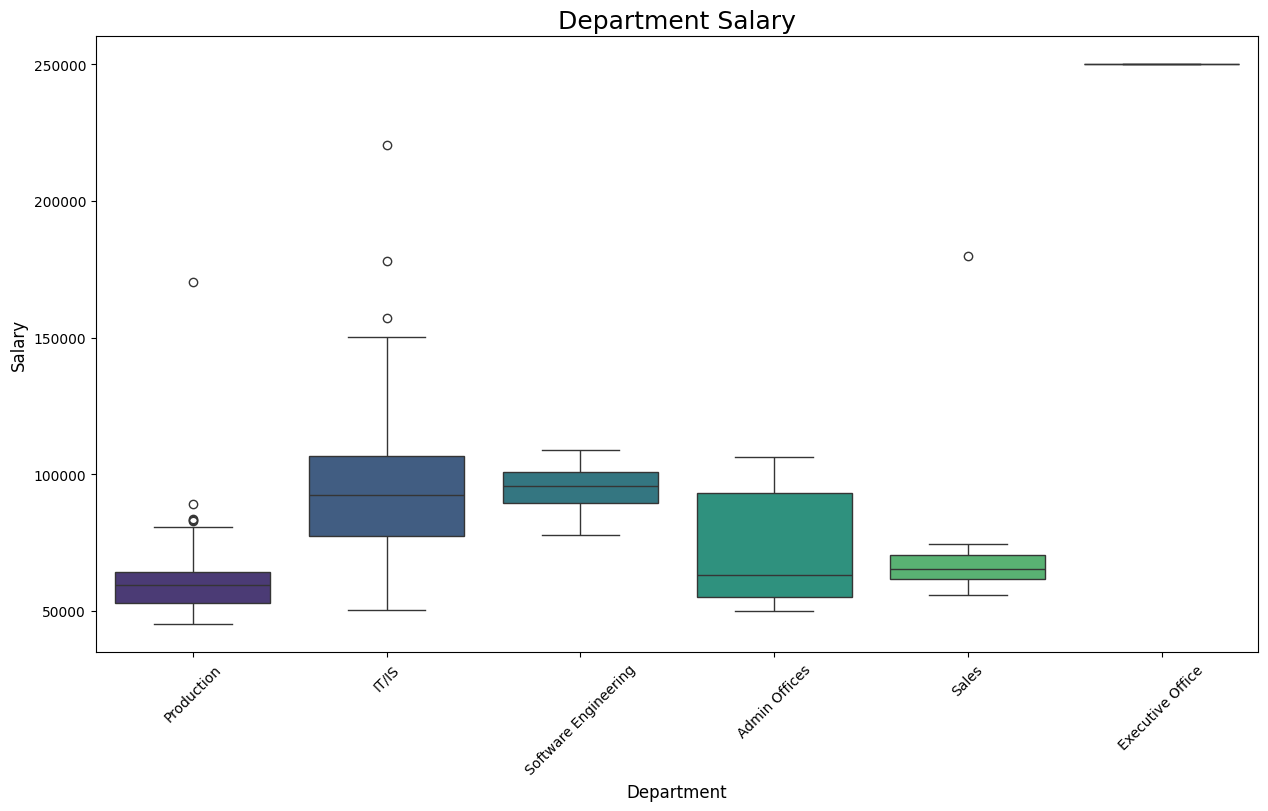

In [20]:
plt.figure(figsize = (15, 8))

sns.boxplot(x = 'Department', y = 'Salary', data = df, palette = 'viridis')
plt.title("Department Salary", fontsize = 18)

plt.xlabel("Department",fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation = 45)
plt.show()

In [21]:
df.groupby('Sex')['Salary'].median()

Sex
F    62066.5
M    63353.0
Name: Salary, dtype: float64

In [22]:
df.groupby('Sex')['Department'].value_counts()

Sex  Department          
F    Production              126
     IT/IS                    22
     Sales                    15
     Admin Offices             6
     Software Engineering      6
     Executive Office          1
M    Production               83
     IT/IS                    28
     Sales                    16
     Software Engineering      5
     Admin Offices             3
Name: count, dtype: int64

<Figure size 1500x800 with 0 Axes>

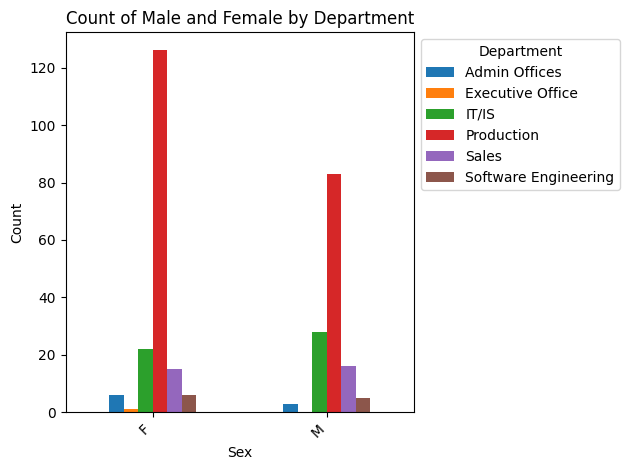

In [23]:
grouped = df.groupby('Sex')['Department'].value_counts().unstack()

# Plotting
plt.figure(figsize=(15, 8))
grouped.plot(kind='bar', stacked=False)

plt.title('Count of Male and Female by Department')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Department', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
df.groupby('Department').agg({'Absences': 'sum', 'EngagementSurvey': 'mean'})

,Absences,EngagementSurvey
Department,,
Admin Offices,78,4.393333
Executive Office,10,4.830000
IT/IS,522,4.154000
Production,2120,4.129569
Sales,358,3.818710
Software Engineering,96,4.061818


In [25]:
df[df['Termd'] == 1].groupby('TermReason')['Employee_Name'].count()

TermReason
Another position                    20
Fatal attraction                     1
Learned that he is a gangster        1
attendance                           7
career change                        9
gross misconduct                     1
hours                                8
maternity leave - did not return     3
medical issues                       3
military                             4
more money                          11
no-call, no-show                     4
performance                          4
relocation out of area               5
retiring                             4
return to school                     5
unhappy                             14
Name: Employee_Name, dtype: int64

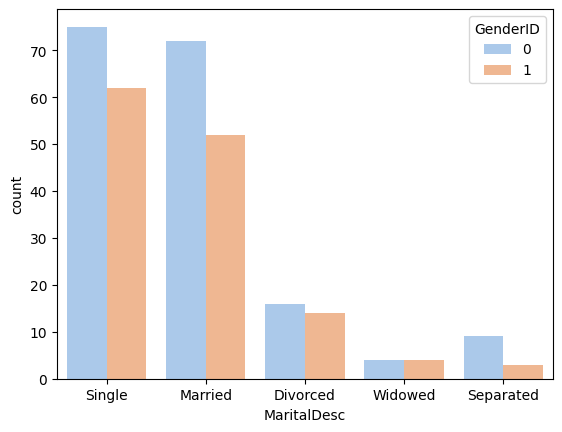

In [26]:
sns.countplot(x = 'MaritalDesc', hue = 'GenderID', data = df, palette = 'pastel')
plt.show()

In [27]:
df.Position.unique()

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

In [28]:
df['Position'] = df['Position'].replace('Data Analyst ', 'Data Analyst')

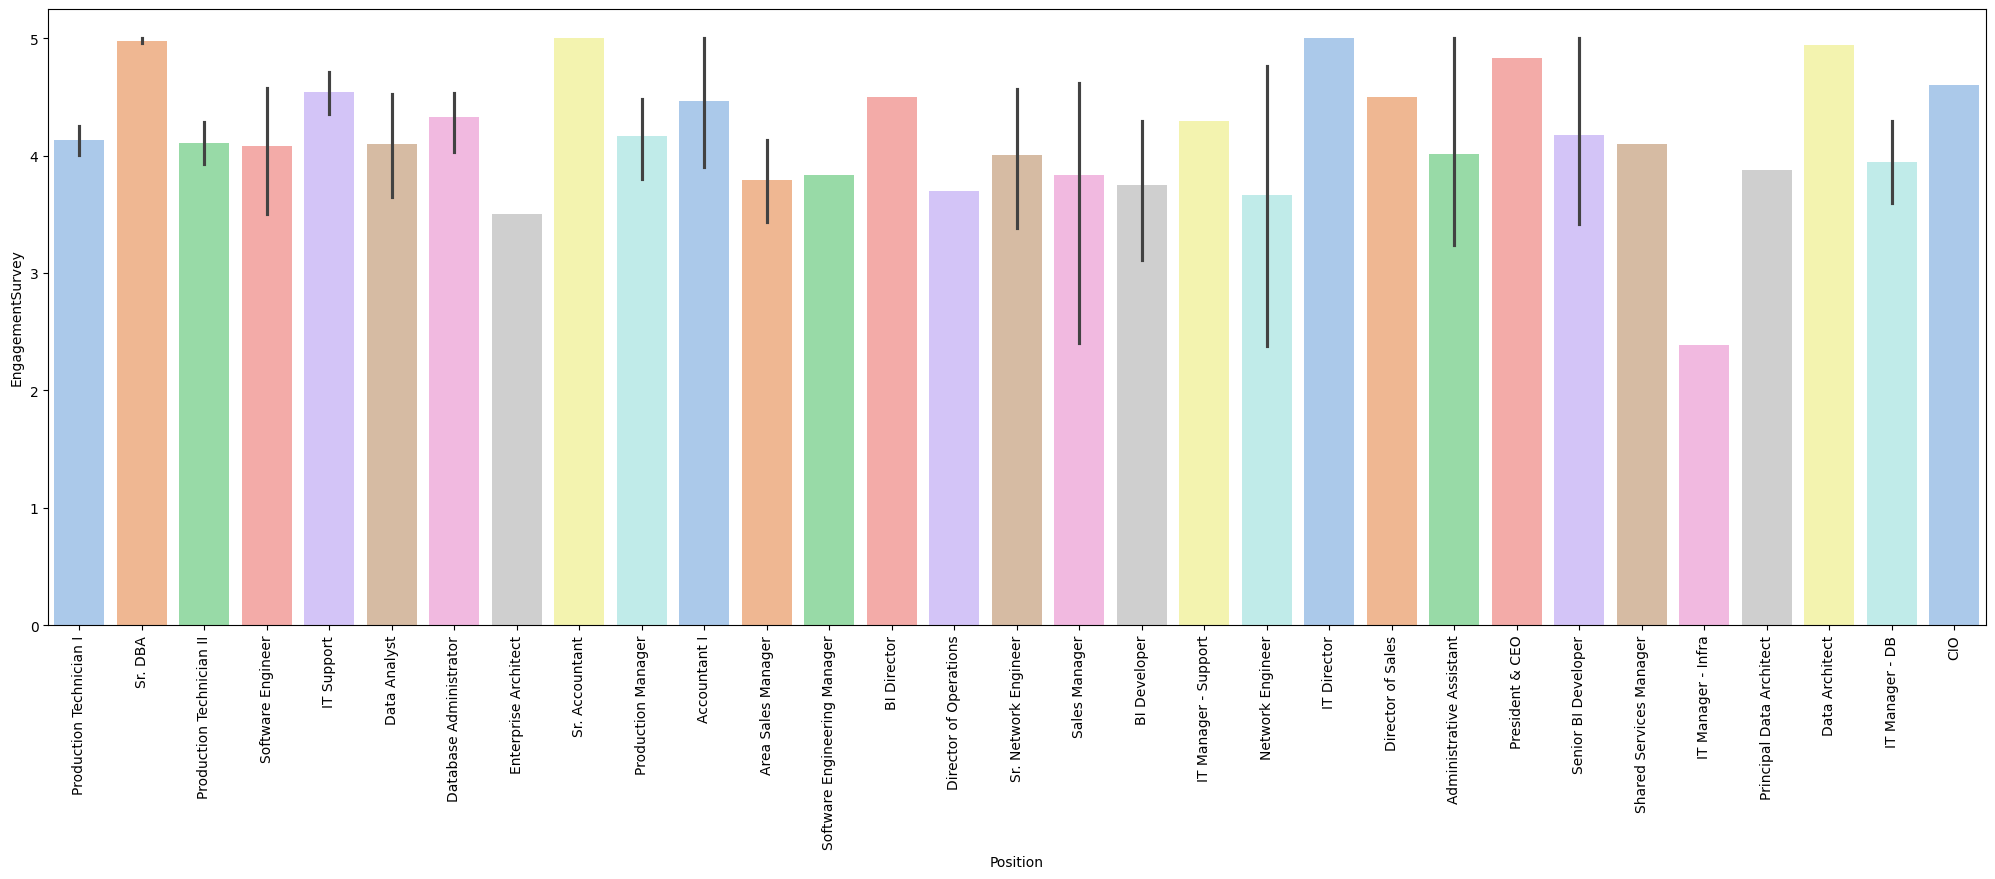

In [29]:
plt.figure(figsize = (25, 8))
sns.barplot(x = 'Position', y = 'EngagementSurvey', data = df, palette = 'pastel')
plt.xticks(rotation=90)
plt.show()

In [30]:
df.EmpSatisfaction.value_counts()

EmpSatisfaction
3    108
5     98
4     94
2      9
1      2
Name: count, dtype: int64

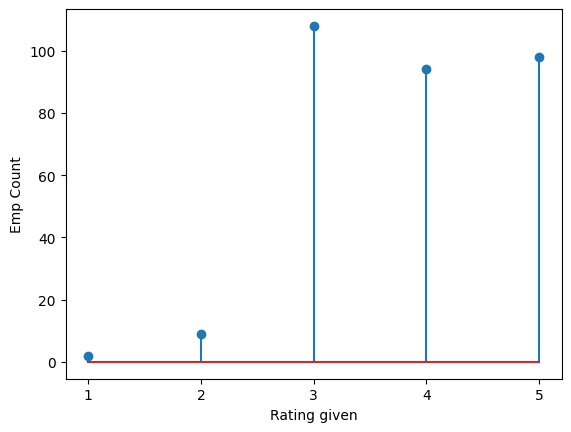

In [31]:
a = df.EmpSatisfaction.value_counts()
plt.stem(a.index, a)
plt.ylabel("No of emloyees")
plt.xticks(a.index)
plt.xlabel("Rating given")
plt.ylabel("Emp Count")
plt.show()

In [32]:
df.PerformanceScore.value_counts()

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

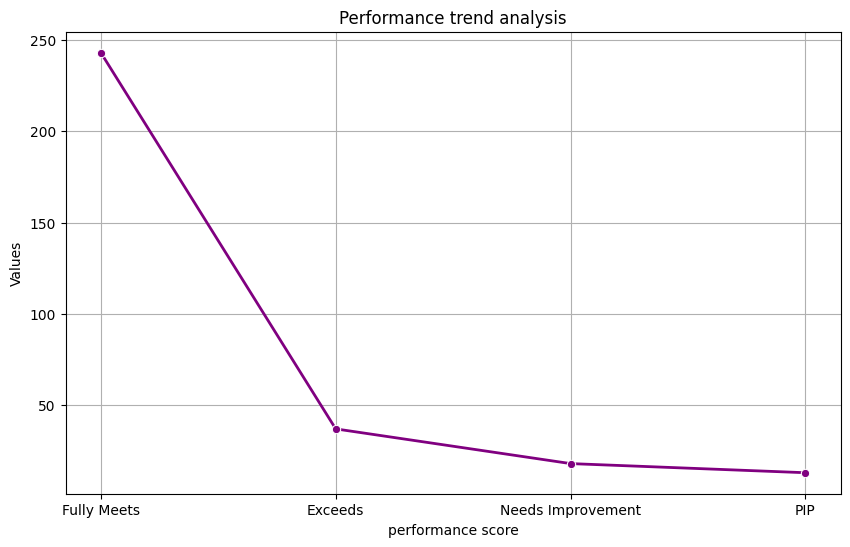

In [33]:
b = df.PerformanceScore.value_counts()
plt.figure(figsize = (10, 6))
sns.lineplot(data = b, marker = 'o', color = 'purple', linewidth = 2)


plt.title("Performance trend analysis")
plt.xlabel("performance score")
plt.ylabel("Values")
plt.grid()
plt.show()

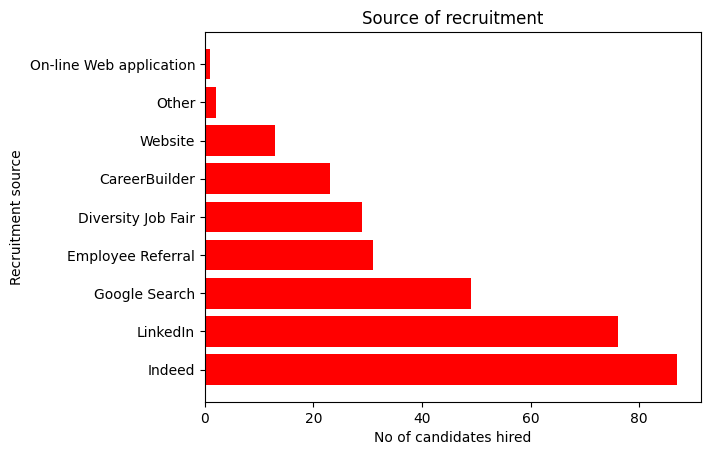

In [34]:
c = df.RecruitmentSource.value_counts()
plt.barh(c.index, c, color = 'r')
plt.title("Source of recruitment", fontsize = 12)
plt.xlabel("No of candidates hired")
plt.ylabel("Recruitment source")

plt.show()

In [35]:
df.groupby('Sex').agg({'Absences': 'mean', 'SpecialProjectsCount': 'sum'})

,Absences,SpecialProjectsCount
Sex,,
F,10.261364,183
M,10.207407,196


In [36]:
df.groupby('Department')['Absences'].sum()

Department
Admin Offices             78
Executive Office          10
IT/IS                    522
Production              2120
Sales                    358
Software Engineering      96
Name: Absences, dtype: int64

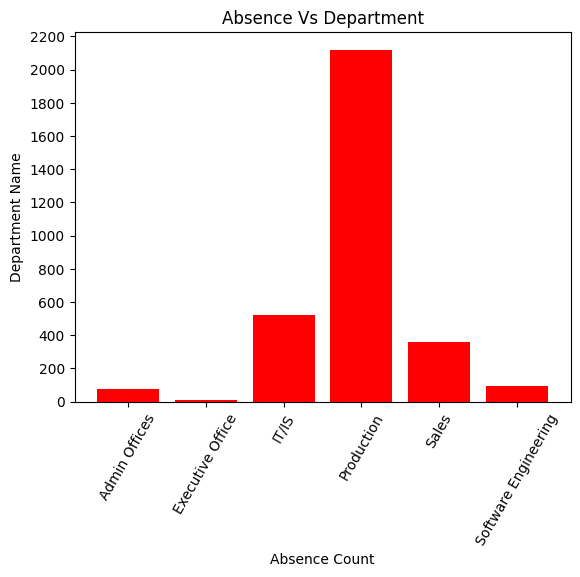

In [37]:
d = df.groupby('Department')['Absences'].sum()

plt.bar(d.index, d, color = 'r')
plt.title("Absence Vs Department", fontsize = 12)
plt.xlabel("Absence Count")
plt.xticks(rotation = 60)
plt.ylabel("Department Name")
plt.yticks(range(0,2300, 200))

plt.show()

In [38]:
df.groupby('MaritalDesc')['Absences'].sum()

MaritalDesc
Divorced      300
Married      1355
Separated     103
Single       1339
Widowed        87
Name: Absences, dtype: int64

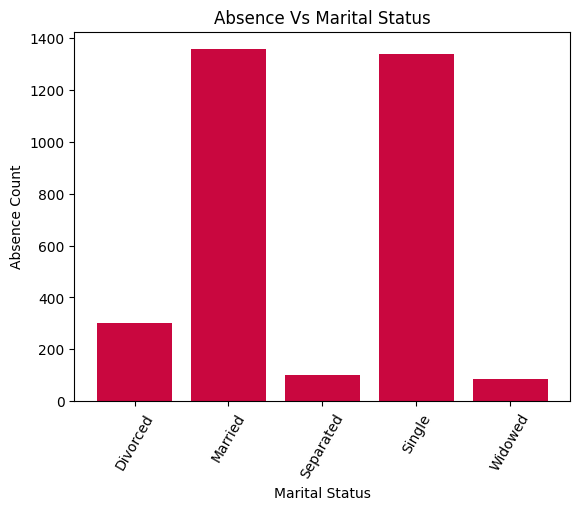

In [39]:
e = df.groupby('MaritalDesc')['Absences'].sum()

plt.bar(e.index, e, color = '#c9073f')
plt.title("Absence Vs Marital Status", fontsize = 12)
plt.xlabel("Marital Status")
plt.xticks(rotation = 60)
plt.ylabel("Absence Count")

plt.show()

In [40]:
f = df.groupby(['Department', 'MaritalDesc', 'Sex']).agg({'Absences': 'sum'}).reset_index()
print(f)

              Department MaritalDesc Sex  Absences
0          Admin Offices    Divorced   M         3
1          Admin Offices     Married   F        44
2          Admin Offices     Married   M        20
3          Admin Offices      Single   F         2
4          Admin Offices      Single   M         9
5       Executive Office     Married   F        10
6                  IT/IS    Divorced   M        35
7                  IT/IS     Married   F       110
8                  IT/IS     Married   M       165
9                  IT/IS   Separated   F        11
10                 IT/IS      Single   F       102
11                 IT/IS      Single   M        92
12                 IT/IS     Widowed   F         7
13            Production    Divorced   F       175
14            Production    Divorced   M        71
15            Production     Married   F       549
16            Production     Married   M       319
17            Production   Separated   F        59
18            Production   Sepa

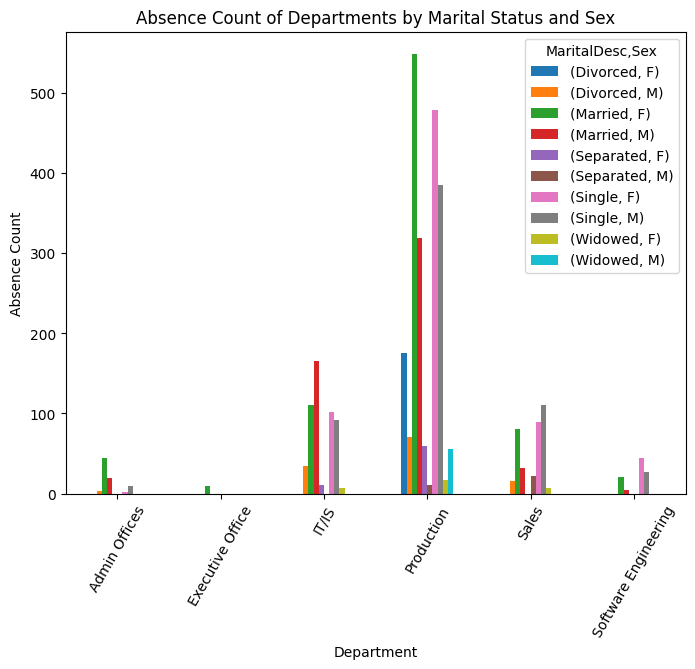

In [41]:
g = f.pivot_table(index='Department', columns=['MaritalDesc', 'Sex'], values='Absences', aggfunc='sum', fill_value=0)
g.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title("Absence Count of Departments by Marital Status and Sex", fontsize = 12)
plt.xlabel("Department")
plt.xticks(rotation = 60)
plt.ylabel("Absence Count")


plt.show()